# Logistic Regression with Python
For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

### Import Libraries
Let's import some libraries to get started!

In [1]:
#pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/th/4wk9mg4j3674pkjtsrtmfmzh0000gn/T/matplotlib-zr62ksra because the default path (/Users/shikharanand/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

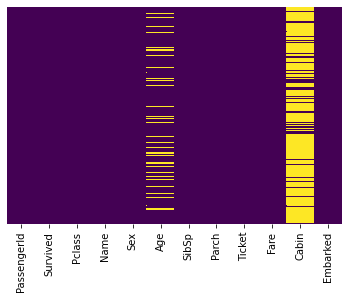

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<AxesSubplot:xlabel='Survived', ylabel='count'>

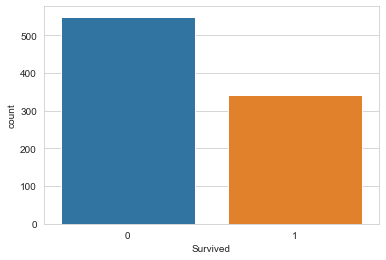

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

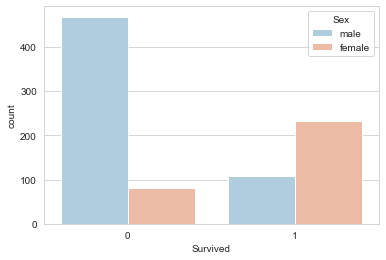

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data = train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

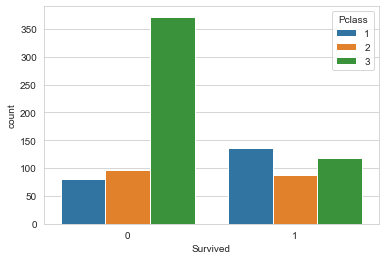

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data = train)

/Users/shikharanand/Anaconda3/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

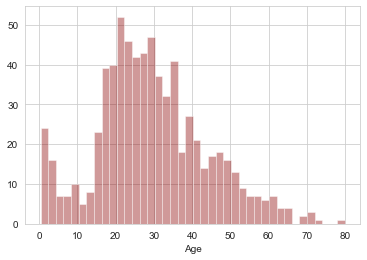

In [11]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

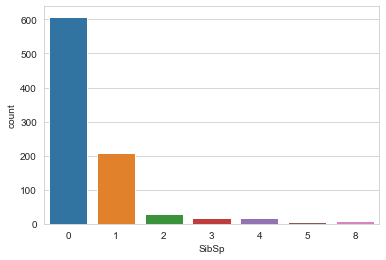

In [12]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

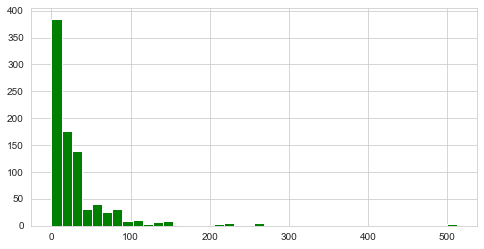

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Cufflinks for plots
Let's take a quick moment to show an example of cufflinks!

In [14]:
#pip install cufflinks

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

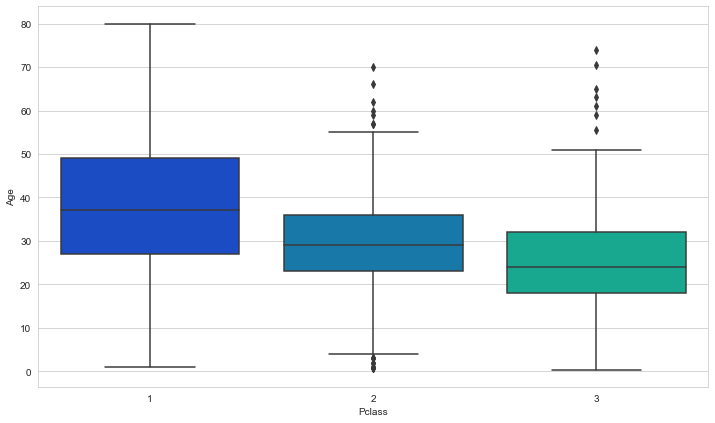

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [18]:
def impute_age(cols):
    age = cols[0]
    pClass = cols[1]
    
    if pd.isnull(age):
        
        if pClass == 1:
            return 37
        
        if pClass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return age


In [19]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

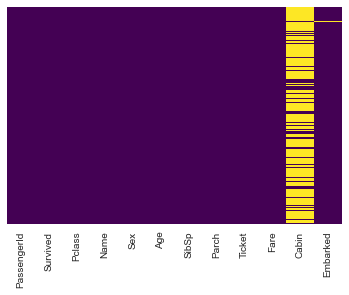

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [21]:
train.drop('Cabin', axis = 1, inplace = True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
pd.get_dummies(train['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [28]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
train = pd.concat([train, sex, embark], axis = True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

### Building a Logistic Regression model
Let's start by splitting our data into a training set and test set.

### Train Test Split

In [32]:
train_data = train.drop('Survived', axis=1)

In [33]:
test_data = train['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(train_data, test_data, test_size = 0.30, random_state = 101)

In [36]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

### Training and Predicting

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/shikharanand/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [39]:
prediction = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cf = confusion_matrix(y_test, prediction)

In [42]:
cf

array([[148,  15],
       [ 39,  65]])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy = accuracy_score(y_test, prediction)

In [45]:
accuracy

0.797752808988764

In [46]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

Let's move on to evaluate our model!

### Evaluation
We can check precision,recall,f1-score using classification report!

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



The precision is not so bad after all.